In [2]:
import json
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import feltorutilities as fp
import magneticfielddb as mag
import simplesimdb as simplesim
import xarray as xr
import xfeltor

plt.rcParams.update({'font.size': 22})
pd.set_option('display.float_format', lambda x: '%.2e' % x)

In [55]:
data = simplesim.Manager( directory="./data", filetype="nc")
diag = simplesim.Manager( executable="./feltordiag.sh", directory="diag", filetype="nc")
plot = simplesim.Manager( executable ="./feltorplot.sh", directory="plot", filetype = "nc")

In [60]:
content = diag.table()
print( f"The database contains {np.size(content)} simulations")
i = 0
for file in content:
    
    print( diag.outfile( file), " split into ", diag.count( file), " file(s)", i)
    i+=1

The database contains 8 simulations
diag/07bb8c63064fff3844e807b59765c472390f380a.nc  split into  1  file(s) 0
diag/1e12d0ffd949e5264cd4cdec8aa6f94ef2fbd9fd.nc  split into  6  file(s) 1
diag/1f0eaf0c7fb6cdb7c9b90ba6d048be4ec9a70cd7.nc  split into  7  file(s) 2
diag/33752dd60b65c471ded739466e3f196ad1c410d9.nc  split into  9  file(s) 3
diag/415f7f4c866c5b5ca52190480827a8a1d0509c75.nc  split into  3  file(s) 4
diag/8ac4466911250523fd7d43a12a7b3fc69a6ee460.nc  split into  3  file(s) 5
diag/e83f3139cea7427f74a6039f13d57467b7841f3c.nc  split into  6  file(s) 6
diag/fc1fd9311d29a97b314cdfa6abf2a7f8ae199754.nc  split into  1  file(s) 7


In [5]:
config = fp.load_default_config()

with open( "config.json", 'w') as f:
    json.dump( config, f,
        sort_keys=True, ensure_ascii=True, indent=4)

In [6]:
# for file in content :
# #     if file != content[6]:
# #         continue
#     for i in range( 0, data.count(file)) :
#         print( "Diag ", data.outfile( file), i)
#         diag.create(file,i,error="display")
# #         print( "Plot ", data.outfile( file), i)
# #         plot.create(file,i,error="display")

Diag  ./data/1e12d0ffd949e5264cd4cdec8aa6f94ef2fbd9fd.nc 0
Existing simulation 1e12d0...fbd9fd.nc
Diag  ./data/1e12d0ffd949e5264cd4cdec8aa6f94ef2fbd9fd.nc 1
Existing simulation 1e12d0...9fd0x1.nc
Diag  ./data/1e12d0ffd949e5264cd4cdec8aa6f94ef2fbd9fd.nc 2
Existing simulation 1e12d0...9fd0x2.nc
Diag  ./data/1e12d0ffd949e5264cd4cdec8aa6f94ef2fbd9fd.nc 3
Existing simulation 1e12d0...9fd0x3.nc
Diag  ./data/1e12d0ffd949e5264cd4cdec8aa6f94ef2fbd9fd.nc 4
Existing simulation 1e12d0...9fd0x4.nc
Diag  ./data/1e12d0ffd949e5264cd4cdec8aa6f94ef2fbd9fd.nc 5
Existing simulation 1e12d0...9fd0x5.nc
Diag  ./data/33752dd60b65c471ded739466e3f196ad1c410d9.nc 0
Existing simulation 33752d...c410d9.nc
Diag  ./data/33752dd60b65c471ded739466e3f196ad1c410d9.nc 1
Existing simulation 33752d...0d90x1.nc
Diag  ./data/33752dd60b65c471ded739466e3f196ad1c410d9.nc 2
Existing simulation 33752d...0d90x2.nc
Diag  ./data/33752dd60b65c471ded739466e3f196ad1c410d9.nc 3
Existing simulation 33752d...0d90x3.nc
Diag  ./data/33752dd

In [7]:
# def create_merged_dataset( manager, file ) :
#     datasetpaths = []
#     for i in range( 0, manager.count( file)) :
#         datasetpaths.append( manager.outfile( file, i) )
#     dataset = xr.open_mfdataset(datasetpaths, concat_dim='time', decode_times=False, join = "outer")
#     # dann brauchst du nen filter damit du die doppelten zeitschritte rausfilter kannst
#     filter = np.zeros_like(dataset["time"][:], dtype=bool)
#     filter[np.unique(dataset["time"][:], return_index=True)[1]] = True
#     return (dataset, filter)
#dann kannst du zb die zeit und masse als numpy array laden und damit hantieren
# (du kannst auch mit denen als xarray hantieren dafür gibts aber nicht alle numpy array funktionen ,
# dafür ist es wesentlich schneller!)
#time = np.asarray(dataset["time"][filter])
#mass = np.asarray(dataset["mass"][filter])


def create_merged_dataset( manager, file ) :
    datasetpaths = []
    for i in range( 0, manager.count( file)) :
        datasetpaths.append( manager.outfile( file, i) )
    return xfeltor.open_feltordataset( datasetpaths)


In [61]:
 # Temporary easy work with only one list element
full_content = diag.table()
content = []
content.append( full_content[1])
content.append( full_content[3])
content.append( full_content[4])
content.append( full_content[6])

### Mass flux out of separatrix

Invert for given numerical parameters
Average flux is 4.59e-04 pm 1.69e-04
Total average mass loss rate is 2259.5
Total mass gain by sources is 8387.4
particle confinement time = 1.99e+03


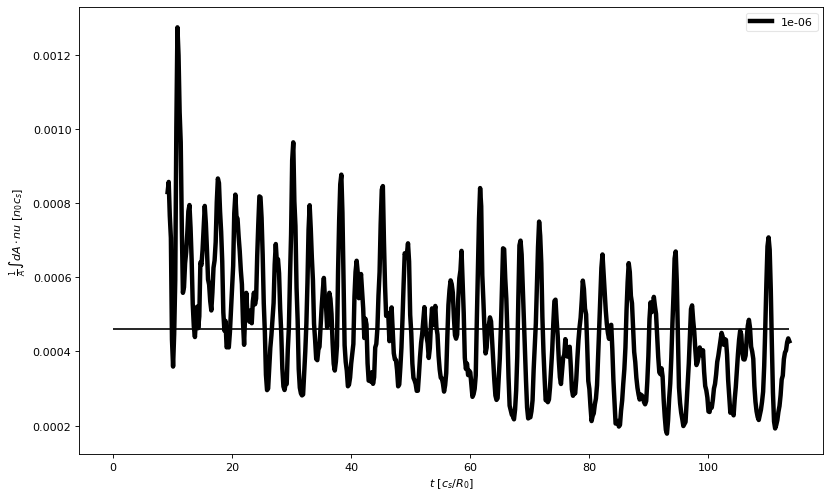

Invert for given numerical parameters
Average flux is 1.74e-03 pm 1.99e-04
Total average mass loss rate is 8573.1
Total mass gain by sources is 8387.4
particle confinement time = 4.88e+02


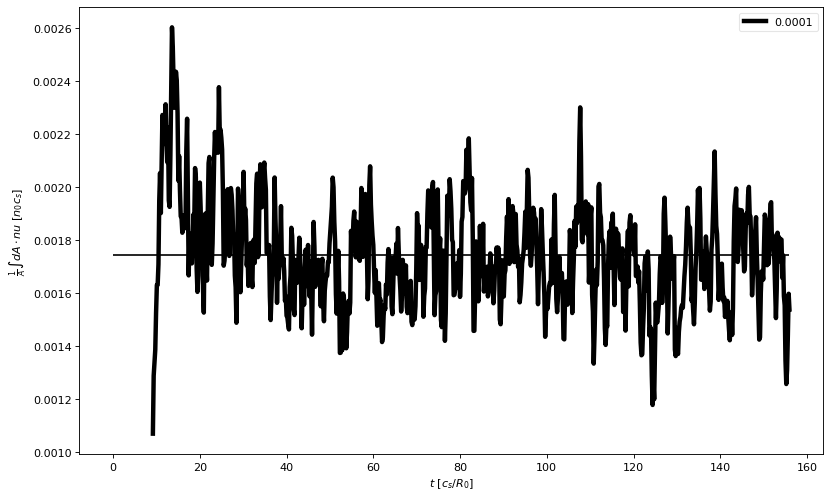

Invert for given numerical parameters
Average flux is 3.37e-03 pm 3.73e-04
Total average mass loss rate is 16577.3
Total mass gain by sources is 8387.4
particle confinement time = 2.41e+02


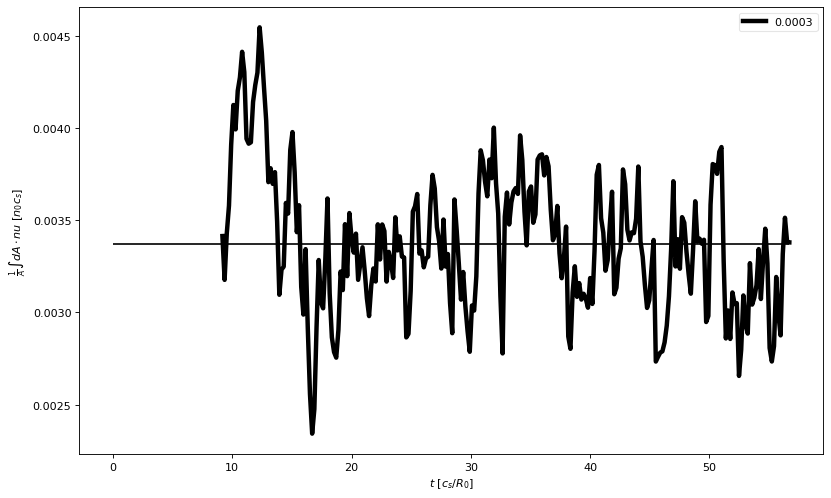

Invert for given numerical parameters
Average flux is 7.02e-04 pm 1.48e-04
Total average mass loss rate is 3451.2
Total mass gain by sources is 8387.4
particle confinement time = 1.27e+03


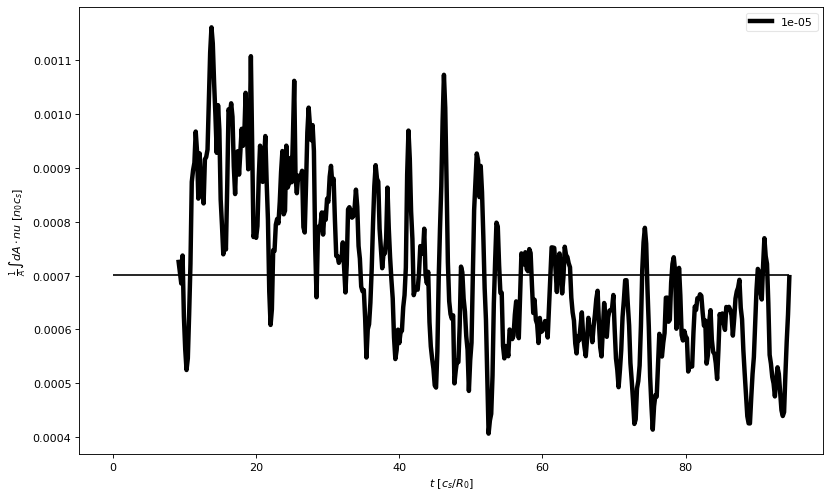

Average flux  [0.00045941 0.00174308 0.00337049 0.00070169]
Sigma flux  [0.00016886 0.00019926 0.00037328 0.00014846]
Confinement time  [1086145.10972155  265936.77249344  131226.53081393  694555.54166609]


In [82]:
# Observations: 
# - jvne is larger than perpendicular diffusion
# - perpendicular diffusion is larger than parallel diffusion
min_idx = 50
resistivity = np.array([])
confinement_time = np.array([])
average_flux = np.array([])
total_flux = np.array([])
sigma_flux = np.array([])

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dd = Dataset( data.outfile(file), 'r')
    #da = Dataset( diag.outfile(file), "r")
    da = create_merged_dataset( diag, file)
    da0 = Dataset( diag.outfile( file, 0), 'r')
    #pl = nc.Dataset( plot.outfile(file), "r")
    
    #print( dset)
    pp = json.loads( da.inputfile )
    time = np.asarray(da['time'][:])
    #print( time)
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    rho = da0['rho'][:]
    rho_t = da0['rho_t'][:]
    rho_p = da0['rho_p'][:]
    lcfs = np.argmax( rho_t[np.where( rho_t < 1)])
    idx = lcfs
    area = da0['psi_area'][:]
    volume = da0['psi_vol'][:]
    
    num = {"R_0" : pp["magnetic_field"]['params']["R_0"], **pp["physical"]}
    fp.numerical2physical( num, pp['physical'])
#     print( pp["physical"])
    timescale = fp.omega_0_inv(**pp['physical'])*1e3 # in ms
    timescale = 1/num['R_0'] # R_0 / c_s
#     timescale = 1
    fluxscale = fp.c_s(**pp['physical'])*pp['physical']['n_0']
    
    mass =np.asarray(da['electrons_ifs_lcfs'][:])
    average_mass = np.mean(mass)
    masstt=np.append(np.zeros(1),mass, axis=0)
    deltamass = np.diff(masstt)/deltat

    # jvne= dset.variables['jvneE_tt_fsa'][:,:]
    jvne=np.asarray(da['jvneC_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(da['jvneE_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(da['jvneA_tt_ifs_lcfs'][:])/deltat
    divjvne = np.asarray(da["divjnepar_tt_ifs_lcfs"][:])/deltat
    average_jvne = np.mean(jvne[min_idx:]) # don't keep initial phase in statistics
    sigma_jvne = jvne[min_idx:].std()
    source = np.asarray(da["sne_tt_ifs_lcfs"][:])/deltat
    average_source = source[min_idx:].mean()
    resistivity = np.append( resistivity, pp["physical"]["resistivity"])
    print( f"Average flux is { average_jvne/area[idx]:1.2e} pm {sigma_jvne/area[idx]:1.2e}")
    print( f"Total average mass loss rate is {average_jvne:6.1f}")
    print( f"Total mass gain by sources is {average_source:6.1f}" )
    average_flux = np.append( average_flux, average_jvne/area[idx] )
    total_flux = np.append( total_flux, average_jvne)
    sigma_flux = np.append(sigma_flux, sigma_jvne/area[idx] )
    print( f"particle confinement time = {average_mass/average_jvne*timescale:1.2e}")
    confinement_time = np.append( confinement_time, average_mass/average_jvne*timescale )
    tau = mass/jvne

    plt.plot(time[min_idx:]*timescale,jvne[min_idx:]/area[idx], color='k', 
             marker='',ls='-', lw=4,markeredgecolor='k', markersize=8, 
             label=f'{pp["physical"]["resistivity"]}')
    plt.hlines(average_jvne/area[idx], time[0]*timescale, time[len(time)-1]*timescale, color='k')

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    da.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")
    plt.ylabel(r"$\frac{1}{A}\int dA \cdot nu\ [n_0c_s]$")

    plt.show(   )


Resistivity  [1.e-06 1.e-04 3.e-04 1.e-05]
Average flux  [0.00045941 0.00174308 0.00337049 0.00070169]
Total flux  [ 2259.52900138  8573.08591309 16577.27742162  3451.15819593]
Sigma flux  [0.00016886 0.00019926 0.00037328 0.00014846]
Confinement time  [1086145.10972155  265936.77249344  131226.53081393  694555.54166609]


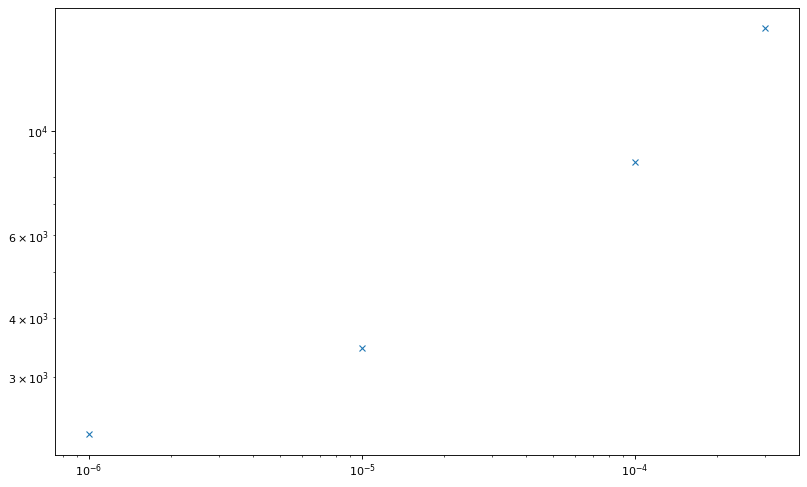

In [86]:
print( "Resistivity ", resistivity)
print( "Average flux ", average_flux)
print( "Total flux ", total_flux)
print( "Sigma flux ", sigma_flux)
print( "Confinement time ", confinement_time)

fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
plt.plot(resistivity, total_flux, marker='x', ls='')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

### Volume Integrated Mass conservation

Resistivity = 1e-06
Average diff =  -74.93281089438356


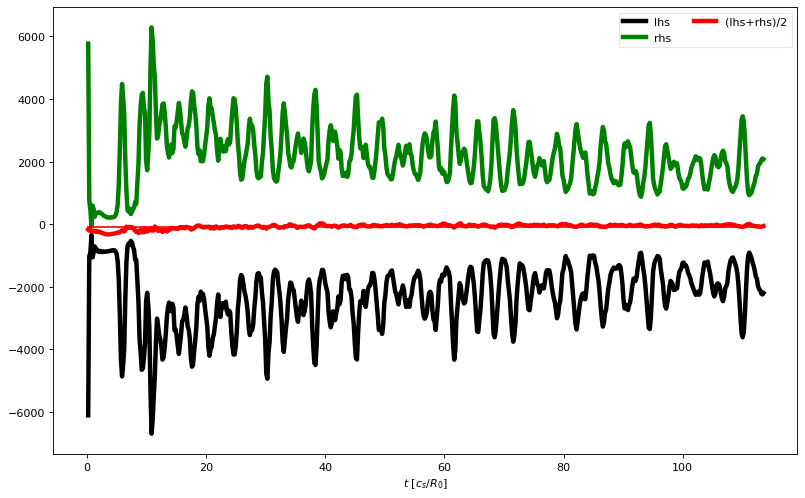

Resistivity = 0.0001
Average diff =  44.91299571626448


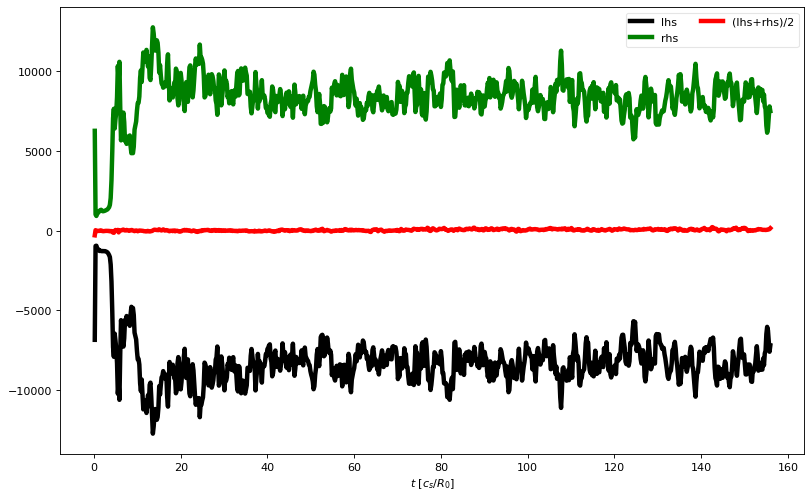

Resistivity = 0.0003
Average diff =  117.00058646146083


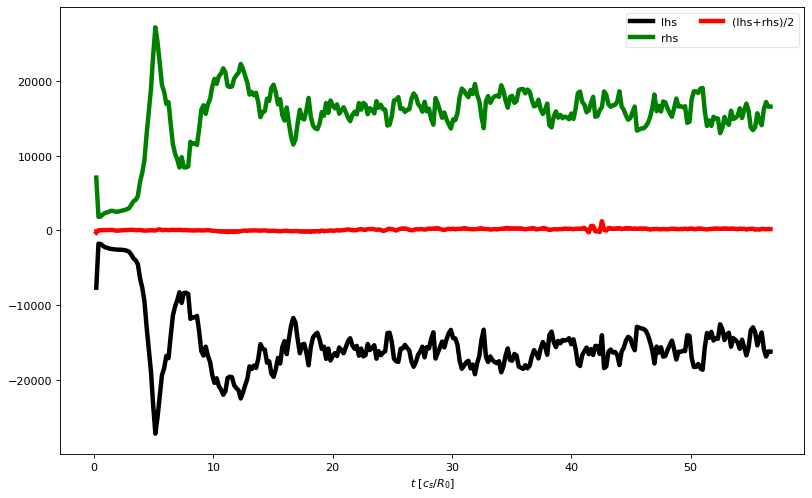

Resistivity = 1e-05
Average diff =  -46.208238751899366


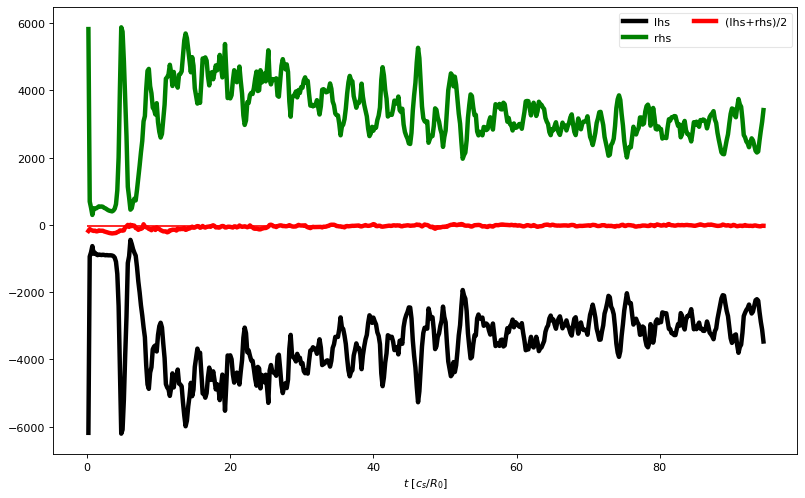

In [63]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dset = Dataset( diag.outfile(file), 'r')
    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )
    time = np.asarray(dset['time'][:])
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    
    mass = np.asarray(dset.variables['electrons_ifs_lcfs'][:])
    masstt=np.append(np.zeros(1),mass, axis=0)

    deltamass = np.diff(masstt,axis=0)/deltat
    source = np.asarray(dset.variables['sne_tt_ifs_lcfs'][:])/deltat
    deltamass-=source
    jvne= np.asarray(dset['jvneE_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvneC_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvneA_tt_ifs_lcfs'][:])/deltat
    divjvnepar=np.asarray(dset['divjnepar_tt_ifs_lcfs'][:])/deltat
    #jvne+=divjvnepar

    diff_perp = np.asarray(dset["lneperp_tt_ifs_lcfs"][:])/deltat
    diff_para = np.asarray(dset["lneparallel_tt_ifs_lcfs"][:])/deltat
    rhs = jvne-diff_perp-diff_para
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean(diff[1:])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff)
    plt.plot(time[1:]*timescale,deltamass[1:], color='k', marker='',
              ls='-', lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[1:]*timescale,rhs[1:], color='g', marker='',
              ls='-', lw=4,markeredgecolor='g', markersize=8, label="rhs")
    plt.plot(time[1:]*timescale,diff[1:], color='r', marker='',ls='-', 
              lw=4,markeredgecolor='r', markersize=8, label="(lhs+rhs)/2")
    plt.hlines(average_diff, time[0]*timescale, time[len(time)-1]*timescale, color='r')
#     plt.plot(time[min_idx:]*timescale,divjvnepar[min_idx:], color='g', marker='',
#              ls='--', lw = 4, label="parallel")

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")

    plt.show(   )

### Average FSA Mass conservation 

Resistivity = 1e-06
Average diff =  1.849251509737975e-06
Average std  =  4.250277352917976e-06
Resistivity = 0.0001
Average diff =  1.6835785641118723e-06
Average std  =  2.82104688352846e-06
Resistivity = 0.0003
Average diff =  1.3325834419653574e-06
Average std  =  2.7993340431132457e-06
Resistivity = 1e-05
Average diff =  1.6633221067405266e-06
Average std  =  3.8088222242506404e-06


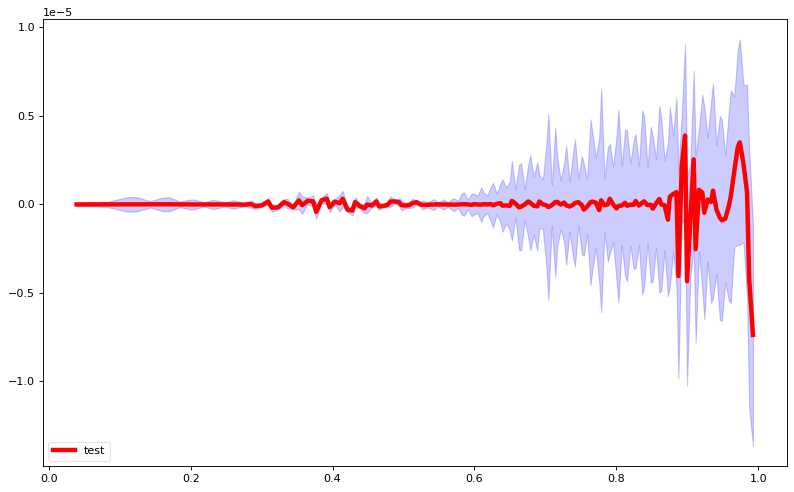

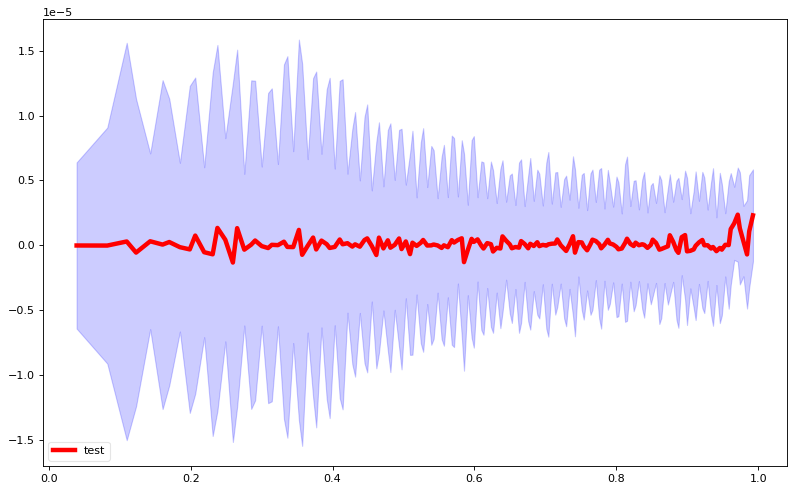

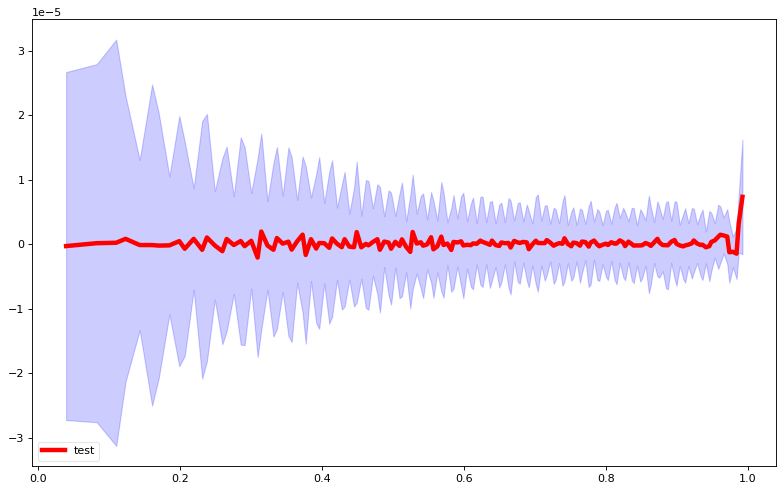

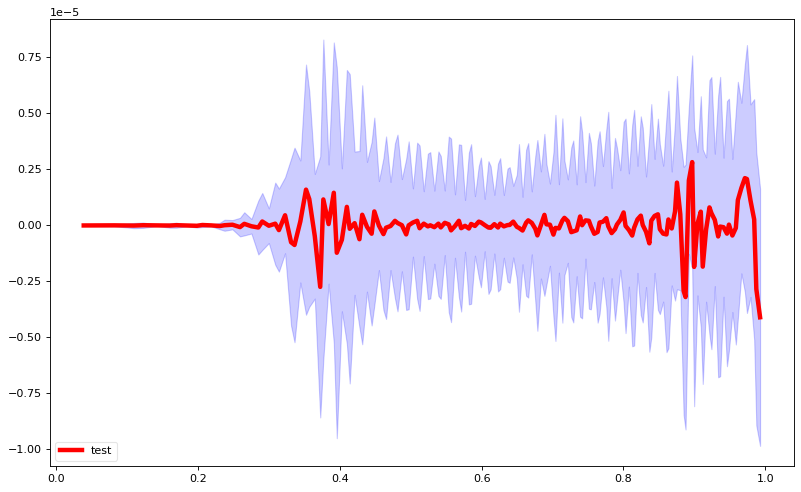

In [64]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dset = Dataset( diag.outfile(file), 'r')
    
    dset = create_merged_dataset( diag, file)
    params = json.loads(dset.inputfile)
    mass =np.asarray(dset.variables['electrons_fsa'][:,:])
    time = np.asarray(dset.variables['time'][:])
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    masstt=np.append(np.zeros((1,len(rho))),mass, axis=0)
    deltamass = np.diff(masstt,axis=0)/deltat[:,None]
    source = np.asarray(dset.variables['sne_tt_fsa'][:,:])/deltat[:,None]
    deltamass-=source

    jvneC=np.asarray(dset.variables['jvneC_tt_ifs'][:,:])/deltat[:,None]
    jvneE=np.asarray(dset.variables['jvneE_tt_ifs'][:,:])/deltat[:,None]
    jvneA=np.asarray(dset.variables['jvneA_tt_ifs'][:,:])/deltat[:,None]
    jvne = jvneC+jvneE+jvneA
    
    diff_perp = np.asarray(dset.variables["lneperp_tt_fsa"][:,:])/deltat[:,None]
    diff_parallel = np.asarray(dset.variables["lneparallel_tt_fsa"][:,:])/deltat[:,None]
    rhs = jvne-diff_perp-diff_parallel
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean( diff[1:], axis=0)
    average_std =  np.std( diff[1:], axis=0)
    idx=160
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff[idx])
    print( "Average std  = ", average_std[idx])

    plt.plot( rho_t[0:167], average_diff[0:167], ls = '-', color='r', lw = 4, label = 'test')
    plt.fill_between( rho_t[0:167], average_diff[0:167]-average_std[0:167], 
                      average_diff[0:167]+average_std[0:167], color='b', alpha=0.2)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='lower left',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()

### Local Mass conservation on LCFS

Resistivity = 1e-06
Average diff =  0.0010078420728071985
Average std  =  0.002316401157340293
Resistivity = 0.0001
Average diff =  0.0009175503174409686
Average std  =  0.0015374705515230106
Resistivity = 0.0003
Average diff =  0.0007262579758711198
Average std  =  0.001525637053496719
Resistivity = 1e-05
Average diff =  0.0009065105481735876
Average std  =  0.0020758081122166


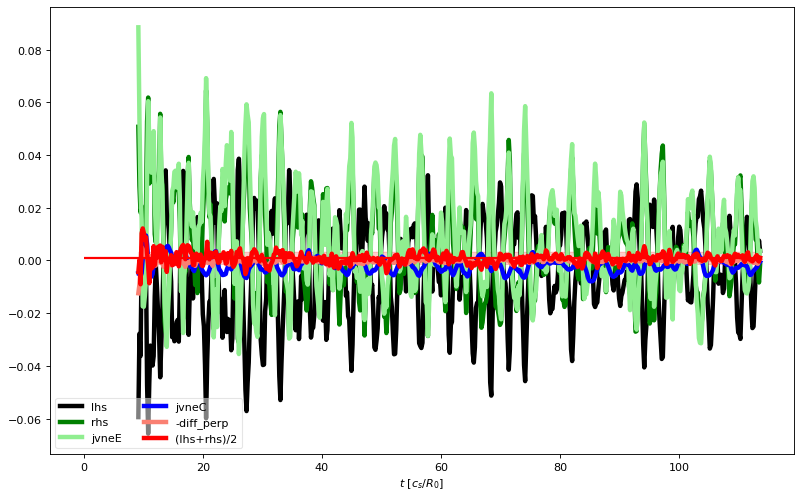

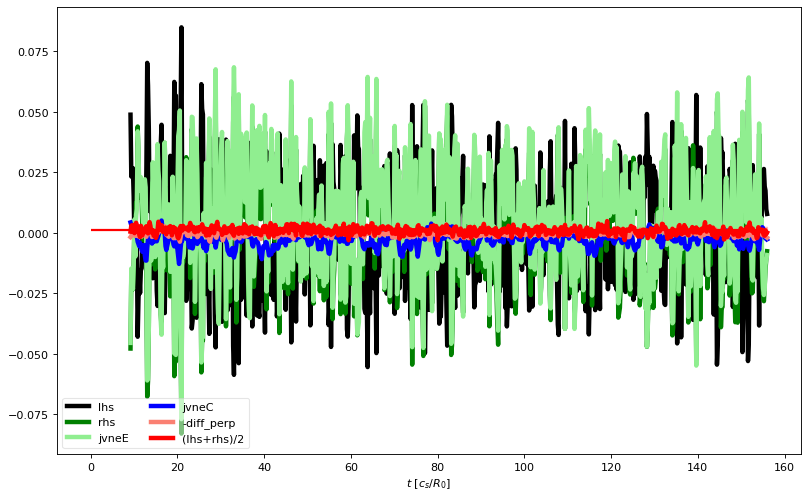

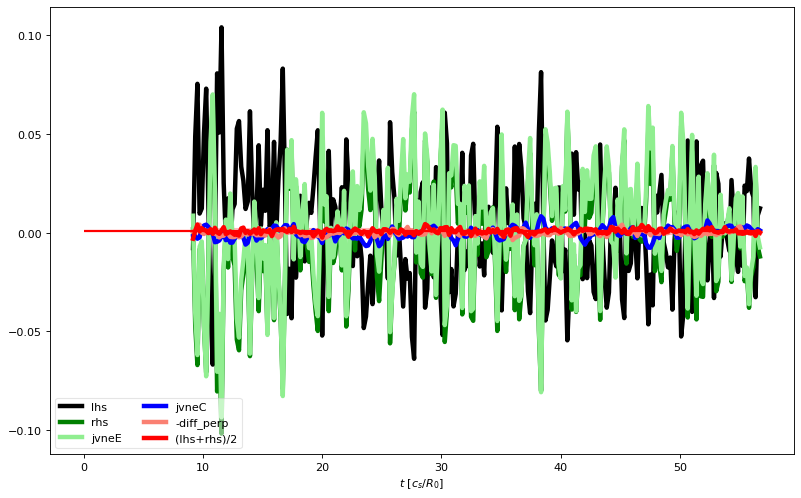

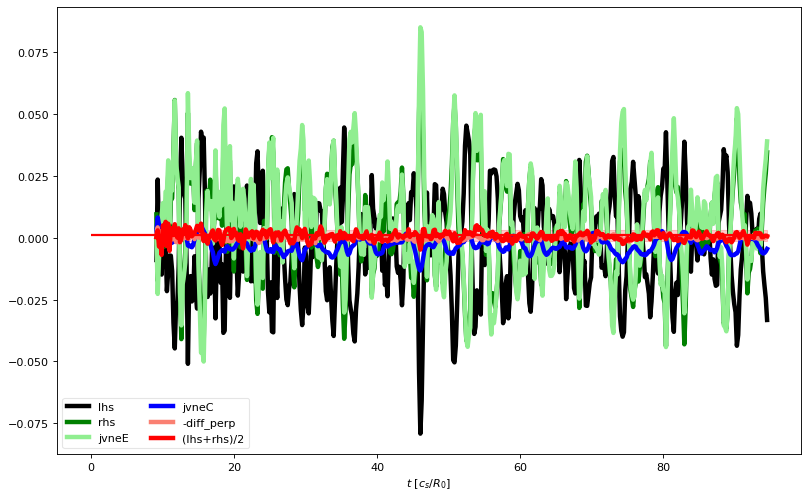

In [65]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    params= json.loads(dset.inputfile)
    mass =np.asarray(dset.variables['electrons_fsa'][:,:])
    time = np.asarray(dset.variables['time'][:])*timescale
    timett = np.append(2*time[len(time)-1] -time[len(time)-2], time ) # extrapolate
    deltat = np.diff(timett)
    masstt=np.append(np.zeros((1,len(rho))),mass, axis=0)
    deltamass = np.diff(masstt,axis=0)/deltat[:,None]
    source = np.asarray(dset.variables['sne_tt_fsa'][:,:])/deltat[:,None]
    deltamass-=source

    jvneC=np.asarray(dset.variables['jvneC_tt_ifs'][:,:])/deltat[:,None]
    jvneE=np.asarray(dset.variables['jvneE_tt_ifs'][:,:])/deltat[:,None]
    jvneA=np.asarray(dset.variables['jvneA_tt_ifs'][:,:])/deltat[:,None]
    jvne = jvneC+jvneE+jvneA
    
    diff_perp = np.asarray(dset.variables["lneperp_tt_fsa"][:,:])/deltat[:,None]
    diff_parallel = np.asarray(dset.variables["lneparallel_tt_fsa"][:,:])/deltat[:,None]
    rhs = jvne-diff_perp-diff_parallel
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean( diff[1:], axis=0)
    average_std =  np.std( diff[1:], axis=0)
    idx=160
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff[idx])
    print( "Average std  = ", average_std[idx])
    plt.plot(time[min_idx:],deltamass[min_idx:,idx], color='k', marker='',
              ls='-',lw=4, label="lhs")
    plt.plot(time[min_idx:],rhs[min_idx:,idx], color='g',
              ls='-', lw = 4,  label="rhs")
    plt.plot(time[min_idx:],jvneE[min_idx:,idx], color='lightgreen',
              ls='-', lw = 4, label="jvneE")
    plt.plot(time[min_idx:],jvneC[min_idx:,idx], color='blue',
              ls='-', lw = 4, label="jvneC")
    plt.plot(time[min_idx:],-diff_perp[min_idx:,idx], color='salmon',
              ls='-', lw = 4,  label="-diff_perp")
    plt.plot(time[min_idx:],diff[min_idx:,idx], color='r',
              ls='-', lw = 4,  label="(lhs+rhs)/2")
    plt.hlines(average_diff[idx], time[0], time[len(time)-1], color='r', lw=2 )
    plt.fill_between( time[min_idx:], average_diff[idx]-average_std[idx], 
                      average_diff[idx]+average_std[idx], color='red', alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='lower left',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    plt.xlabel(r"$t\ [c_s/R_0]$")

### Density profile

Resistivity = 1e-06
Dataset length  620
Average region  9.174311926605505 113.57798165137615
Resistivity = 0.0001
Dataset length  851
Average region  9.174311926605505 155.9633027522936
Resistivity = 0.0003
Dataset length  310
Average region  9.174311926605505 56.69724770642202
Resistivity = 1e-05
Dataset length  516
Average region  9.174311926605505 94.49541284403671


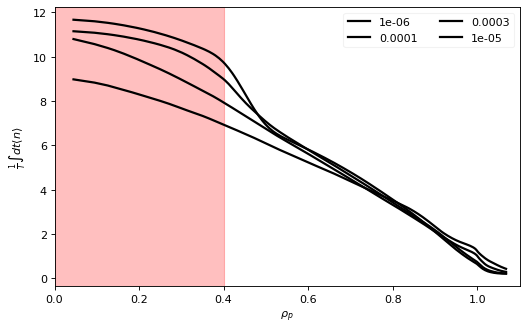

In [71]:

fig,ax=plt.subplots(1,1,figsize=(1.25*6,1.25*3.7),dpi= 80, facecolor='w', edgecolor='k')
for file in content :


    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )

    time = np.asarray(dset.variables['time'][:])

    density =dset.variables['electrons_fsa'][:]
    source = dset.variables['sne_tt_fsa'][:]
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Dataset length ", len(time))
    print( "Average region ", time[min_idx]*timescale, time[len(time)-1]*timescale)
    avg_density=density[min_idx:len(time)-1].mean(axis=0)
    avg_source = source.mean(axis=0)
    plt.plot( rho_p, avg_density, color='k', ls='-', lw=2, label=f'{params["physical"]["resistivity"]}')
    # plt.plot( rho_t, density[len(time)-1,:],color=v[0],ls='-', lw=2, label=v[1] )
    # plt.plot( rho_t, avg_source*1000,color=v[0],ls='-', lw=2, label=v[1] )
    # plt.plot( rho_t,   -psi_p*3+1, ls='--', color = 'k')
#     plt.plot( rho_p,   -psi_p/2+1, ls='--', color = 'k')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.25)
    dset.close()
ax.axvspan(0, 0.4, alpha=0.25, color='red')

plt.xlabel(r"$\rho_p$")
# plt.xlabel(r"$\sqrt{\psi_p/\psi_{O}}$")

plt.ylabel(r"$\frac{1}{T}\int dt \langle n\rangle$")
plt.xlim(0,1.1)
# plt.ylim(0,27)
# plt.ylim(0,30000)
plt.show(  )

### Vorticity accuracy on LCFS

Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 1e-06
Average diff =  2.177008426968504e-06
Average std  =  2.319377651512574e-06


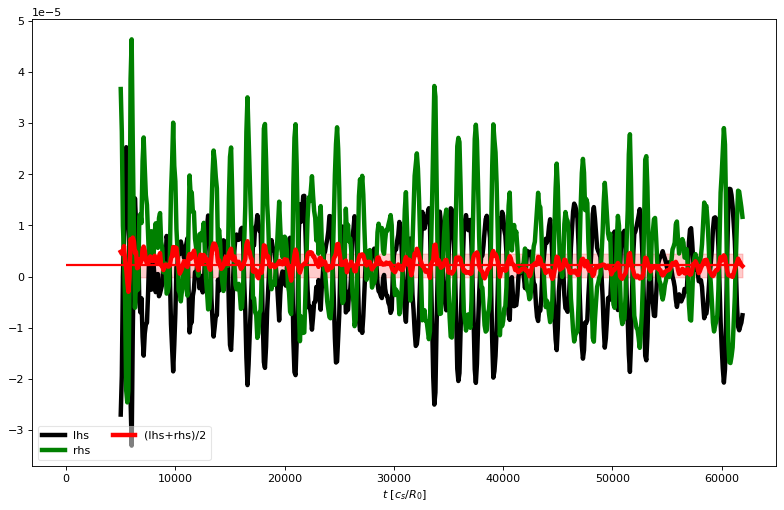

Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 0.0001
Average diff =  5.700185713954006e-06
Average std  =  2.052466804620217e-06


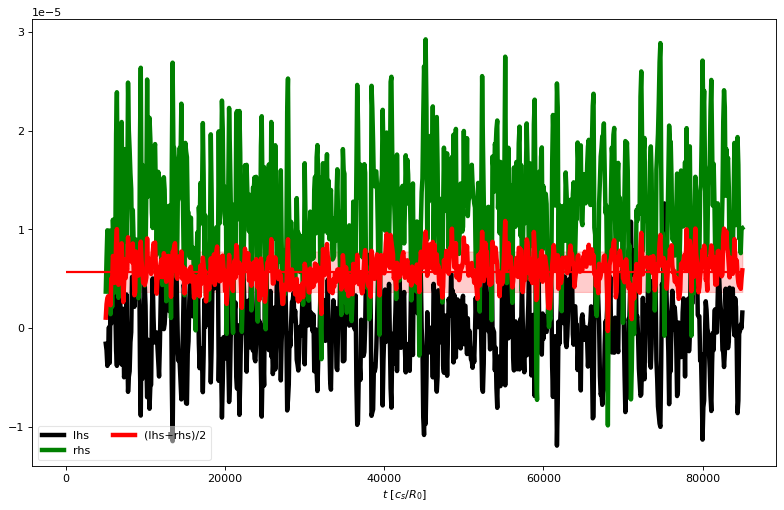

Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 0.0003
Average diff =  8.911560116595707e-06
Average std  =  2.741615216500018e-06


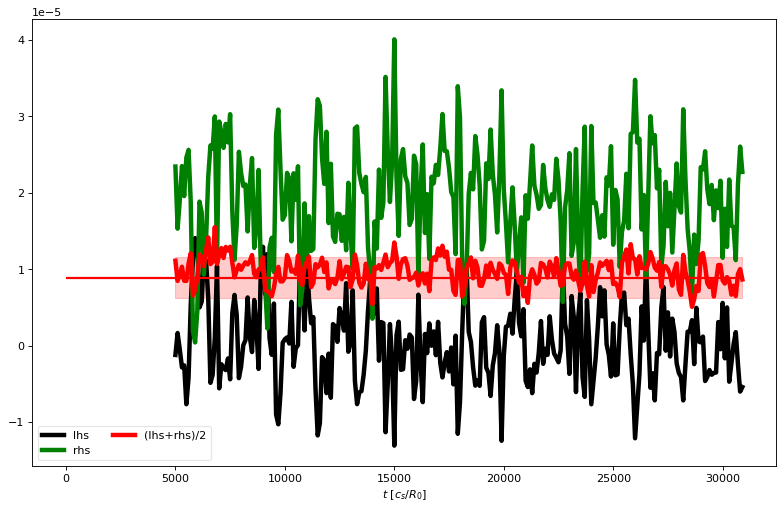

Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 1e-05
Average diff =  3.5067148655508796e-06
Average std  =  2.0581931828031737e-06


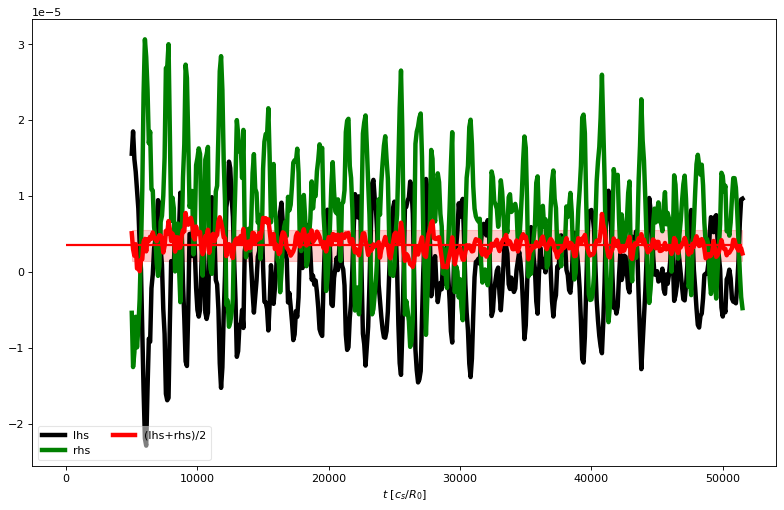

In [67]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )
    time = np.asarray(dset['time'][:])
    timett = np.append(2*time[len(time)-1] -time[len(time)-2], time ) # extrapolate
    deltat = np.diff(timett)
    
#     vorticity = dset['vorticity_fsa'][:,:]
#     el = dset['electrons_ifs'][:,:]
#     ions = dset['ions_ifs'][:,:]
#     dvdpsip=dset['dvdpsi'][:]
#     vorticity = (el-ions)/dvdpsip
    vorticity =np.asarray(dset['oexbe_fsa'][:,:])
    # vorticity+=dset['odiae_fsa'][:,:]
    # vorticity/=dset['electrons_fsa'][:,:]
    tttvorticity=np.append(np.zeros((1,len(rho_t))),vorticity, axis=0)
    deltavorticity = np.diff(tttvorticity,axis=0)/deltat[:,None]
    jvoE= np.asarray(dset['jvoexbe_tt_ifs'][:,:])/deltat[:,None]
    jvoD= np.asarray(dset['jvoexbeUD_tt_ifs'][:,:])/deltat[:,None]
    # jvoD= dset.variables['jvodiaeUE_tt_ifs'][:,:]/deltat[:,None]
    maxwell= np.asarray(dset['jvoapar_tt_ifs'][:,:])/deltat[:,None]
    jvoA= np.asarray(dset['jvoexbApar_tt_ifs'][:,:])/deltat[:,None]
    # jvoA= dset['jvodiaApar_tt_ifs'][filter,:]/deltat[:,None]
    jvo = jvoE + jvoD + maxwell + jvoA
    force = -np.asarray(dset["socurve_tt_fsa"][:,:])/deltat[:,None]
    force -= np.asarray(dset["socurvi_tt_fsa"][:,:])/deltat[:,None]
    force -= np.asarray(dset["socurvkappae_tt_fsa"][:,:])/deltat[:,None]
    force -= np.asarray(dset["socurvkappai_tt_fsa"][:,:])/deltat[:,None]
    # force2 = -dset["curvne_tt_ifs"][:,:]/deltat[:,None]/dvdpsi[:]
    # source = dset["sosne_tt_fsa"][:,:]/deltat[:,None]
    # source+= dset["sospi_tt_fsa"][:,:]/deltat[:,None]
    lamb = np.asarray(dset["loexbe_tt_fsa"][:,:])/deltat[:,None]
    #lamb = dset['lneperp_tt_ifs'][:,:]/deltat[:,None]

    #lamb = lamb/dvdpsip[None,:]

    rhs = jvo+force-lamb#-source
    # diff = +deltavorticity + rhs
    diff = (deltavorticity +rhs)/2
    # delayed_diff = (deltavorticity[0:-1,:]+rhs[1:,:])/2
    average_diff = np.mean( diff[1:], axis=0)
    average_std = np.std( diff[1:], axis=0)
    # rhs = rhs - 2*average_diff[None, :]
    # diff = ( deltavorticity + rhs)/2
    
    lcfs = np.argmax( rho_t[np.where( rho_t < 1)])
    print( "Index 167 vs lcfs", lcfs)
    idx= 167
    print( idx)
    print( rho_t[idx])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff[idx])
    print( "Average std  = ", average_std[idx])
    plt.plot(time[min_idx:],deltavorticity[min_idx:,idx], color='k', marker='',
              ls='-',lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[min_idx:],rhs[min_idx:,idx], color='g', marker='',
              ls='-', lw = 4, markeredgecolor='k', markersize=8, label="rhs")
    plt.plot(time[min_idx:],diff[min_idx:,idx], color='r', marker='',
              ls='-', lw = 4, markeredgecolor='k', markersize=8, label="(lhs+rhs)/2")
#     plt.plot(time[min_idx:],10*jvoE[min_idx:,idx], color='salmon', marker='',
#               ls='-',lw=4,markeredgecolor='k', markersize=8, label="jvoE")
#     plt.plot(time[min_idx:],10*jvoD[min_idx:,idx], color='lightblue', marker='',
#               ls='-',lw=4,markeredgecolor='k', markersize=8, label="jvoD")
#     # plt.plot(time[min_idx:],-source[min_idx:,idx], color='crimson', marker='',
#     #           ls='-', lw = 4, markeredgecolor='k', markersize=8, label="-source")
#     plt.plot(time[min_idx:],force[min_idx:,idx], color='y', marker='',
#               ls='-', lw = 4, markeredgecolor='k', markersize=8, label="force")
#     plt.plot(time[min_idx:],jvoA[min_idx:,idx], color='orange', marker='',
#               ls='-', lw = 4, markeredgecolor='k', markersize=8, label="jvoA")
#     plt.plot(time[min_idx:],maxwell[min_idx:,idx], color='pink', marker='',
#               ls='-', lw = 4, markeredgecolor='k', markersize=8, label="Maxwell")
    # plt.plot(time[min_idx:],-lamb[min_idx:,idx], color='lightyellow', marker='',
    #           ls='-', lw = 4, markeredgecolor='k', markersize=8, label="-lambda")
    plt.hlines(average_diff[idx], time[0], time[len(time)-1], color='r', lw=2 )
    plt.fill_between( time[min_idx:], average_diff[idx]-average_std[idx], 
                      average_diff[idx]+average_std[idx], color='red', alpha=0.2)

    # print(time[len(time)-1])
    # idx = np.where( time[np.where( time < 9356)]>9354)
    # print( idx[0][0] )
    # plt.plot( rho_t, force[ idx[0][0],: ], color='y', label = "force")
    # plt.plot( rho_t, jvo[ idx[0][0],: ], color='r', label = "jvo")
    # plt.plot( rho_t, deltavorticity[ idx[0][0],: ], color='g', label = "dO")
    
    
    # plt.plot( rho_t, average_diff, ls = '-', color=v[0], lw = 4, label = v[1])
    # plt.fill_between( rho_t[0:167], average_diff[0:167]-average_std[0:167], 
    #                   average_diff[0:167]+average_std[0:167], color=v[0], alpha=0.2)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='lower left',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")
    # plt.xlabel(r"$\rho_t$")
    # plt.xlim(0,6)
    # plt.ylabel(r"$\int dV \Omega_E$")
    #plt.xlim(6360,6400)
    # plt.xlim(0,1.0)
    # plt.ylim(-2e-2,2e-2)

    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.show(   )

## Ion parallel momentum plot

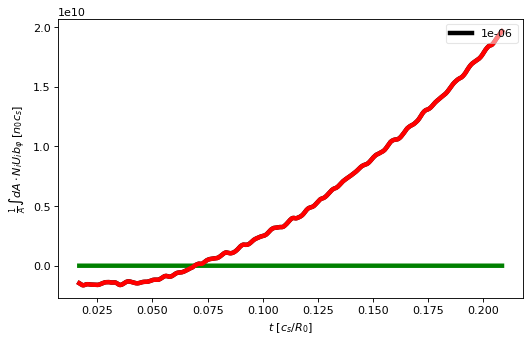

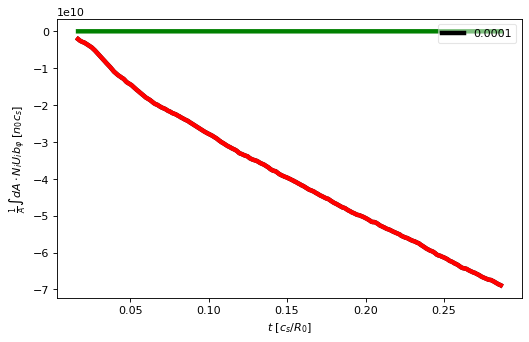

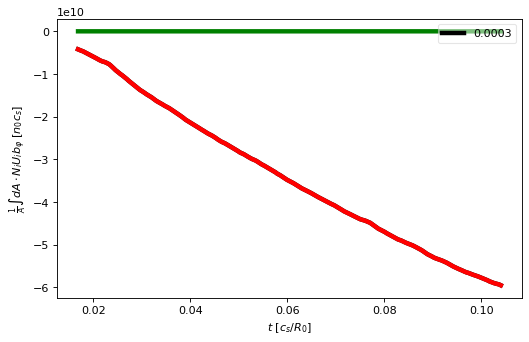

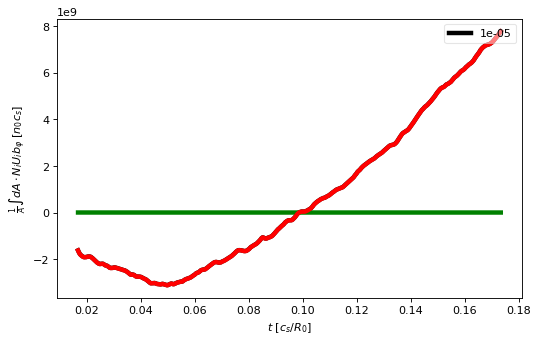

In [89]:
for file in content :
    fig,ax=plt.subplots(1,1,figsize=(1.25*6,1.25*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    params = json.loads( dset.inputfile )
    time = dset.variables['time'][:]*timescale
    
    niuibphi = dset.variables['niuibphi_ifs_lcfs'][:]
    oexb = dset.variables['oexbi_ifs_lcfs'][:]

    plt.plot(time[min_idx:]*timescale,niuibphi[min_idx:], color='k', 
             marker='',ls='-', lw=4,markeredgecolor='k', markersize=8, 
             label=f'{params["physical"]["resistivity"]}')
    plt.plot(time[min_idx:]*timescale,oexb[min_idx:], color='g', 
         marker='',ls='-', lw=4,markeredgecolor='k', markersize=8
         )
    plt.plot(time[min_idx:]*timescale,niuibphi[min_idx:]-oexb[min_idx:], color='r', 
         marker='',ls='-', lw=4,markeredgecolor='r', markersize=8
         )

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    da.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")
    plt.ylabel(r"$\frac{1}{A}\int dA \cdot N_iU_ib_\varphi\ [n_0c_s]$")

    plt.show(   )

### Ion parallel momentum accuracy

Resistivity = 1e-06
Average diff =  -3117033.36278895


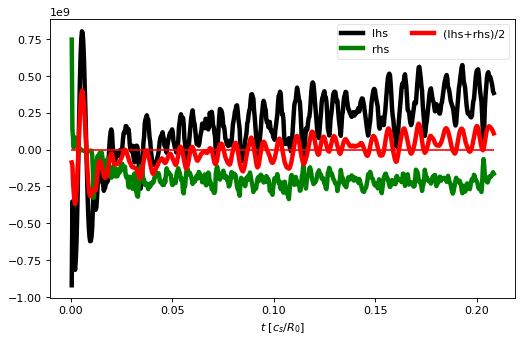

Resistivity = 0.0001
Average diff =  -597974616.2441686


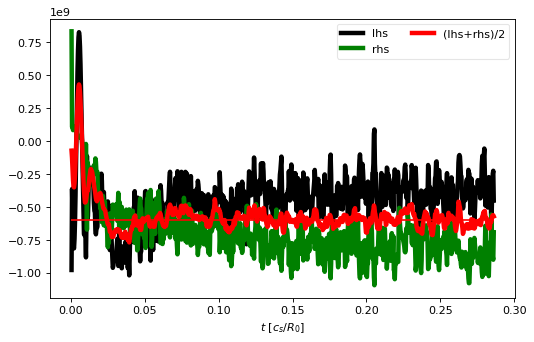

Resistivity = 0.0003
Average diff =  -813483794.9040763


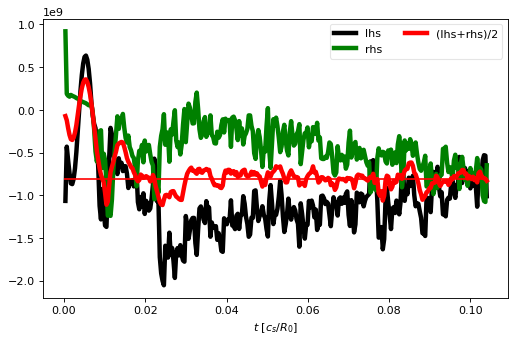

Resistivity = 1e-05
Average diff =  -115970147.402555


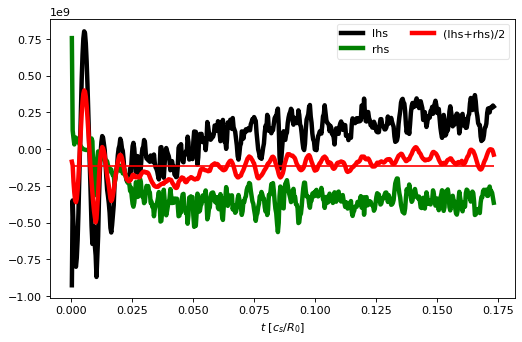

In [69]:
for file in content :
    fig,ax=plt.subplots(1,1,figsize=(1.25*6,1.25*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    params = json.loads( dset.inputfile )
    time = dset.variables['time'][:]*timescale
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    
    mass =np.asarray(dset.variables['niuibphi_ifs_lcfs'][:])
    masstt=np.append(np.zeros(1),mass, axis=0)
    deltamass = np.diff(masstt,axis=0)/deltat

    source = np.asarray(dset.variables['sparsnibphi_tt_ifs_lcfs'][:])/deltat
    deltamass-=source
    jvne= np.asarray(dset['jvparbphiexbi_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvparbphiApar_tt_ifs_lcfs'][:])/deltat
    
    force = -np.asarray(dset.variables["socurve_tt_ifs_lcfs"][:])/deltat
    force -= np.asarray(dset.variables["socurvi_tt_ifs_lcfs"][:])/deltat
    force -= np.asarray(dset.variables["socurvkappae_tt_ifs_lcfs"][:])/deltat
    force -= np.asarray(dset.variables["socurvkappai_tt_ifs_lcfs"][:])/deltat
    rhs = jvne-force
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean(diff[min_idx:])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff)
    plt.plot(time[1:]*timescale,deltamass[1:], color='k', marker='',
              ls='-', lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[1:]*timescale,rhs[1:], color='g', marker='',
              ls='-', lw=4,markeredgecolor='g', markersize=8, label="rhs")
    plt.plot(time[1:]*timescale,diff[1:], color='r', marker='',ls='-', 
              lw=4,markeredgecolor='r', markersize=8, label="(lhs+rhs)/2")
    plt.hlines(average_diff, time[0]*timescale, time[len(time)-1]*timescale, color='r')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")

    plt.show(   )